In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Data preparation

In [2]:
x_seeds = np.array([(0,0),(1,0),(0,1),(1,1)], dtype = float)
y_seeds = np.array([0,1,1,0])

In [3]:
N = 1000
idxs = np.random.randint(0,4,N)

In [4]:
X = x_seeds[idxs]
Y = y_seeds[idxs]

In [5]:
X += np.random.normal(scale=0.25, size=X.shape)

# Data plotting

In [6]:
idx_1 = np.where(Y==1)
idx_0 = np.where(Y==0)

In [7]:
X_0 = X[idx_0]
Y_0 = Y[idx_0]

In [8]:
X_1 = X[idx_1]
Y_1 = Y[idx_1]

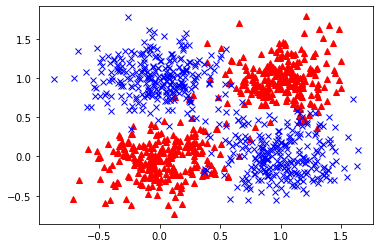

In [9]:
plt.plot(X_0[:,0],X_0[:,1],"r^")
plt.plot(X_1[:,0],X_1[:,1],"bx")
plt.show()

# Model

In [10]:
class shallow_neural_network():
    def __init__(self, num_input_features, num_hiddens):
        self.num_input_features = num_input_features
        self.num_hiddens = num_hiddens
        
        self.W1 = np.random.normal(size = (num_hiddens, num_input_features)) #(3,2)
        self.b1 = np.random.normal(size = num_hiddens) #(3,)
        self.W2 = np.random.normal(size = num_hiddens) #(3,)
        self.b2 = np.random.normal(size = 1) #(1,)
        
    def sigmoid(self,z):
        return 1/(1 + np.exp(-z))
    
    def predict(self,x):
        z1 = np.matmul(self.W1,x) + self.b1 #(3,)
        a1 = np.tanh(z1) #(3,)
        z2 = np.matmul(self.W2,a1) + self.b2 #(1,)
        a2 = self.sigmoid(z2) #(1,)
        return a2, (z1,a1,z2,a2)
        

In [11]:
model = shallow_neural_network(2,3)

# Train

In [12]:
def train(X, Y, model, lr = 0.1):
    dW1 = np.zeros_like(model.W1)
    db1 = np.zeros_like(model.b1)
    dW2 = np.zeros_like(model.W2)
    db2 = np.zeros_like(model.b2)
    m = len(X)
    cost = 0.0
    for x,y in zip(X,Y):
        a2, (z1,a1,z2,_) = model.predict(x)
        if y == 1:
            cost -= np.log(a2)
        else:
            cost -= np.log(1-a2)
            
        diff = a2-y
        
        db2 += diff
        
        # for i in range(model.num_hiddens):
        #     dW2[i] += a1[i]*diff
        dW2 += a1*diff
            
        # for i in range(model.num_hiddens):
        #     db1[i] += (1-a1[i]**2)*model.W2[i]*diff
        db1 += (1-a1**2)*model.W2*diff
            
        # for i in range(model.num_hiddens):
        #     for j in range(model.num_input_features):
        #         dW1[i,j]  += x[j]*(1-a1[i]**2)*model.W2[i]*diff    
                   
        x = x.reshape(1,model.num_input_features)
        tmp = (1-a1**2)*model.W2*diff
        tmp = tmp.reshape(model.num_hiddens,1)
        dW1 += tmp * x
       
                
    cost /= m
    model.W1 -= lr * dW1/m
    model.b1 -= lr * db1/m
    model.W2 -= lr * dW2/m
    model.b2 -= lr * db2/m
    
    return cost

In [13]:
for epoch in range(250):
    cost = train(X,Y,model,1.0)
    if epoch % 10 == 0:
        print(epoch,cost)

0 [1.30836671]
10 [0.65215758]
20 [0.59727557]
30 [0.54930441]
40 [0.49706273]
50 [0.44514712]
60 [0.39983693]
70 [0.36382995]
80 [0.33626476]
90 [0.31489788]
100 [0.29759019]
110 [0.2828387]
120 [0.26975361]
130 [0.25782196]
140 [0.24671922]
150 [0.23624698]
160 [0.22632555]
170 [0.21697447]
180 [0.20826923]
190 [0.20029086]
200 [0.19308927]
210 [0.18667083]
220 [0.1810044]
230 [0.17603404]
240 [0.17169116]


# Test

In [14]:
print(model.predict((1,1))[0].item())
print(model.predict((1,0))[0].item())
print(model.predict((0,1))[0].item())
print(model.predict((0,0))[0].item())

0.022936995420484673
0.9931924216212252
0.950725344551624
0.00989952224426511
